In [250]:
# Assign values to variables
C = 6.69810502993 # Capacitance of membrane
V_1 = 30 # Tuning parameters for steady state and time constant
V_2 = 15
V_3 = 0
V_4 = 30
phi = 0.025 # reference frequency
V_L = -50 # Equilibrum potentials for ion channels
V_Ca = 100
g_Ca = 1.1 # leak, conductances through membrane for each ion
g_K = 2
g_L = 0.5
V = -52.14 # Membrane potential
N = 0.02 # Recovery variance

In [251]:
import numpy as np

#Generate an input stimulus
scale = 0.5
length = 1000
center = 0.5
current = list(scale * np.random.random((length)) + center)

In [252]:
#Define functions
M_ss = lambda: (1/2) * (1 + np.tanh((V - V_1) / V_2))
N_ss = lambda: (1/2) * (1 + np.tanh((V - V_3) / V_4))
T_N = lambda: 1 / (phi * np.cosh((V - V_3) / (2 * V_4)))

#Define differential equations
dV = lambda I: (I - g_L * (V - V_L) - g_Ca * M_ss() * (V - V_Ca) - g_K * N * (V - V_K)) / C
dN = lambda: (N_ss() - N) / T_N()

#Equations for the input of each channel
L = lambda: - g_L * (V - V_L)
Ca = lambda: - g_Ca * M_ss() * (V - V_Ca)
K = lambda: - g_K * N * (V - V_K)

In [253]:
import pandas as pd

#Pandas DataFrame to store variables
data = {
    "t" : [],
    "I" : [],
    "V" : [],
    "N" : [],
    "L" : [],
    "Ca" : [],
    "K" : [],
    "N_ss" : [],
    "T_N" : []
}

for t, I in zip(range(len(current)), current):
	#Update variables
	V = V + dV(I)
	N = N + dN()
	#Update DataFrame
	data["t"].append(t)
	data["I"].append(I)
	data["V"].append(V)
	data["N"].append(N)
	data["L"].append(L())
	data["Ca"].append(Ca())
	data["K"].append(K())
	data["N_ss"].append(N_ss())
	data["T_N"].append(T_N())

data = pd.DataFrame.from_dict(data)
data.head()

,Ca,I,K,L,N,N_ss,T_N,V,t
0,0.002983,0.536129,-0.732667,1.003215,0.020359,0.030263,28.576245,-52.006431,0
1,0.003027,0.509755,-0.750256,0.944745,0.020713,0.030493,28.615216,-51.889489,1
2,0.003080,0.710736,-0.768667,0.876945,0.021064,0.030761,28.660401,-51.753891,2
3,0.003116,0.518293,-0.785264,0.829943,0.021408,0.030949,28.691724,-51.659887,3
4,0.003157,0.634064,-0.802135,0.779044,0.021748,0.031153,28.725641,-51.558088,4


C:\Users\jonathan\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


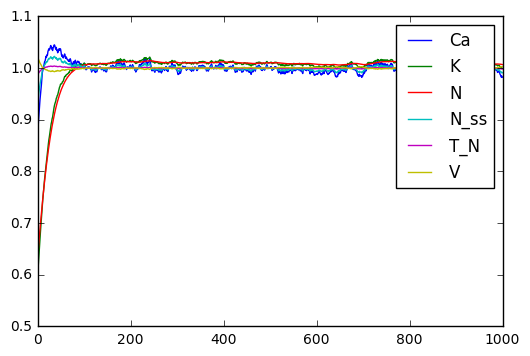

In [254]:
%matplotlib inline
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt

for col in data.keys():
    if col in ["t", "I", "L"]: continue
    plt.plot(data[col]/np.mean(data[col]))
    plt.legend()
plt.show()

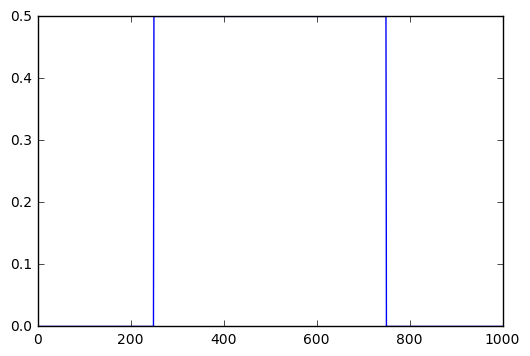

In [255]:
# Generate an input stimulus
value = 0.5
length = 1000
begin = 250
end = 750
current = [0 for _ in range(length)]
current[begin:end] = [value for _ in range(end-begin)]
plt.plot(current)
plt.show()

In [256]:
#Pandas DataFrame to store variables
data = {
    "t" : [],
    "I" : [],
    "V" : [],
    "N" : [],
    "L" : [],
    "Ca" : [],
    "K" : [],
    "N_ss" : [],
    "T_N" : []
}

for t, I in zip(range(len(current)), current):
	#Update variables
	V = V + dV(I)
	N = N + dN()
	#Update DataFrame
	data["t"].append(t)
	data["I"].append(I)
	data["V"].append(V)
	data["N"].append(N)
	data["L"].append(L())
	data["Ca"].append(Ca())
	data["K"].append(K())
	data["N_ss"].append(N_ss())
	data["T_N"].append(T_N())
    
data = pd.DataFrame.from_dict(data)
data.head()

,Ca,I,K,L,N,N_ss,T_N,V,t
0,0.003308,0.0,-1.214075,0.594539,0.032270,0.031904,28.848565,-51.189078,0
1,0.003270,0.0,-1.207415,0.640539,0.032251,0.031715,28.817922,-51.281079,1
2,0.003235,0.0,-1.201071,0.682611,0.032227,0.031543,28.789893,-51.365223,2
3,0.003204,0.0,-1.195030,0.721072,0.032197,0.031387,28.764268,-51.442144,3
4,0.003175,0.0,-1.189278,0.756213,0.032164,0.031245,28.740854,-51.512425,4


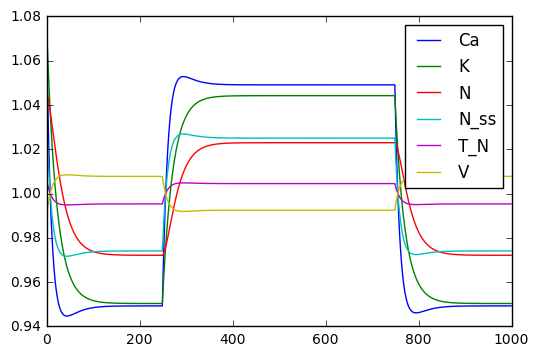

In [257]:
for col in data.keys():
    if col in ["t", "I", "L"]: continue
    plt.plot(data[col]/np.mean(data[col]))
    plt.legend()
plt.show()

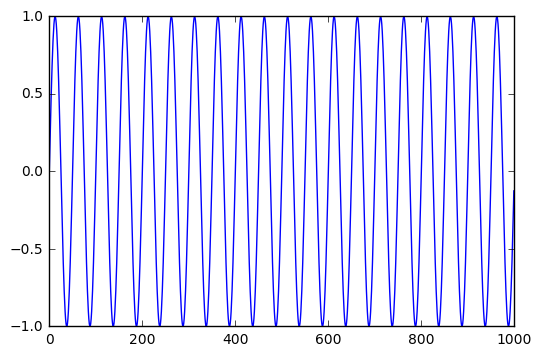

In [258]:
# Generate an input stimulus
scale = 1
step = np.pi/25
length = 1000
current = [np.sin(step*i) for i in range(length)]
plt.plot(current)
plt.show()

In [259]:
#Pandas DataFrame to store variables
data = {
    "t" : [],
    "I" : [],
    "V" : [],
    "N" : [],
    "L" : [],
    "Ca" : [],
    "K" : [],
    "N_ss" : [],
    "T_N" : []
}

for t, I in zip(range(len(current)), current):
	#Update variables
	V = V + dV(I)
	N = N + dN()
	#Update DataFrame
	data["t"].append(t)
	data["I"].append(I)
	data["V"].append(V)
	data["N"].append(N)
	data["L"].append(L())
	data["Ca"].append(Ca())
	data["K"].append(K())
	data["N_ss"].append(N_ss())
	data["T_N"].append(T_N())
    
data = pd.DataFrame.from_dict(data)
data.head()

,Ca,I,K,L,N,N_ss,T_N,V,t
0,0.002933,0.000000,-1.071957,1.069025,0.030007,0.030007,28.532380,-52.138051,0
1,0.002940,0.125333,-1.073125,1.059669,0.030008,0.030043,28.538616,-52.119339,1
2,0.002953,0.248690,-1.075390,1.041890,0.030012,0.030112,28.550467,-52.083780,2
3,0.002972,0.368125,-1.078665,1.016691,0.030019,0.030210,28.567264,-52.033381,3
4,0.002996,0.481754,-1.082852,0.985133,0.030030,0.030334,28.588297,-51.970266,4


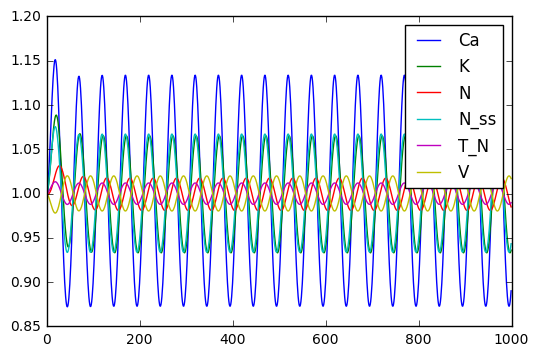

In [260]:
for col in data.keys():
    if col in ["t", "I", "L"]: continue
    plt.plot(data[col]/np.mean(data[col]))
    plt.legend()
plt.show()

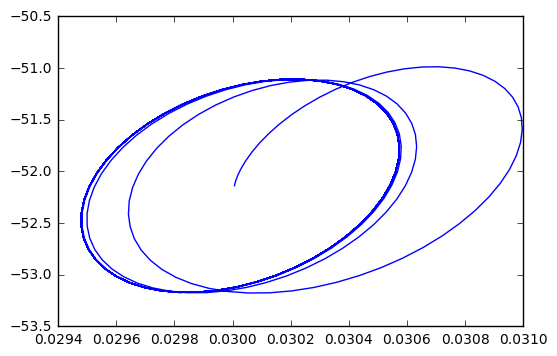

In [261]:
plt.plot(data["N"], data["V"])